In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## for correlation matrices
import seaborn as sns
%matplotlib inline
## for linear models
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix


from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing

from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report



C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Must download from http://web.stanford.edu/group/deepsolar/deepsolar_tract.csv and delete the first ","
df = pd.read_csv("data/deepsolar_tract.csv", encoding = "utf-8")


FileNotFoundError: [Errno 2] File b'data/deepsolar_tract.csv' does not exist: b'data/deepsolar_tract.csv'

In [ ]:
df.shape()

In [5]:
ozdf = pd.read_csv("data/ListOfOppurtunityZonesWithoutAKorHI.csv", encoding = "utf-8")

In [6]:
ozdf = ozdf.rename(columns={"Census Tract Number": "Census_Tract_Number", "Tract Type": "Tract_Type", "ACS Data Source": "ACS_Data_Source"})

In [7]:
mergedf = df.merge(ozdf, left_on = df.fips, right_on = ozdf.Census_Tract_Number)

In [10]:
mergedf.head()

,key_0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate,State,County,Census_Tract_Number,Tract_Type,ACS_Data_Source
0,27145011600,2.0,2.0,25.299013,27145011600,41068.936170,Stearns County,49,278,32,...,0,25,12,0,9.46,Minnesota,Stearns,27145011600,Low-Income Community,2011-2015
1,36071015100,27.0,15.0,1410.939775,36071015100,43428.737300,Orange County,395,1001,0,...,0,40,12,7,15.32,New York,Orange,36071015100,Low-Income Community,2011-2015
2,36071000300,19.0,15.0,522.477104,36071000300,56163.631494,Orange County,293,1013,0,...,0,40,12,7,15.32,New York,Orange,36071000300,Low-Income Community,2011-2015
3,36071000400,11.0,5.0,315.982786,36071000400,40974.934383,Orange County,115,597,17,...,0,40,12,7,15.32,New York,Orange,36071000400,Low-Income Community,2011-2015
4,36071002200,8.0,7.0,277.679574,36071002200,50417.076700,Orange County,272,624,5,...,0,40,12,7,15.32,New York,Orange,36071002200,Low-Income Community,2011-2015


In [158]:
df.set_index(df.fips, inplace=True)

In [159]:
# Remove all deepsolar inputs

df = df.drop(columns=['solar_system_count'], axis = 1)
df = df.drop(columns=['total_panel_area'], axis = 1)
df = df.drop(columns=['solar_panel_area_per_capita'], axis =1)

df = df.drop(columns=['solar_panel_area_divided_by_area'], axis = 1)
df = df.drop(columns=['tile_count_residential'], axis = 1)
df = df.drop(columns=['tile_count_nonresidential'], axis = 1)
df = df.drop(columns=['solar_system_count_residential'], axis =1)

df = df.drop(columns=['solar_system_count_nonresidential'], axis = 1)
df = df.drop(columns=['total_panel_area_residential'], axis = 1)
df = df.drop(columns=['total_panel_area_nonresidential'], axis = 1)
df = df.drop(columns=['number_of_solar_system_per_household'], axis =1)

# Remove all unique identifiers, objects, and booleans
df = df.drop(columns=['county',
                      'state',
                     'electricity_price_transportation',
                     'voting_2016_dem_win',
                     'voting_2012_dem_win'])



In [160]:
df['has_tiles'] = (df.tile_count > 0).mul(1)

In [161]:
df = df.drop('tile_count', axis = 1)

In [162]:
df.has_tiles.value_counts()

1    56258
0    16279
Name: has_tiles, dtype: int64

In [163]:
df = df.dropna()

In [164]:
df.head()

,fips,average_household_income,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,...,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate,has_tiles
fips,,,,,,,,,,,,,,,,,,,,,
27145011200,27145011200,70352.789869,569,1690,13,1757,336,157,4548,26,...,11,13,34,0,0,25,12,0,9.46,0
27145011302,27145011302,71496.886583,854,1459,31,1541,289,276,4480,30,...,11,13,34,0,0,25,12,0,9.46,1
27145011304,27145011304,86840.152755,640,1116,68,1095,231,270,3456,36,...,11,13,34,0,0,25,12,0,9.46,0
27145011400,27145011400,89135.315597,654,1314,15,982,163,170,3348,50,...,11,13,34,0,0,25,12,0,9.46,1
27145011500,27145011500,62225.903614,522,1395,24,1894,442,142,4448,29,...,11,13,34,0,0,25,12,0,9.46,0


In [127]:
# Define X and y
y = df['has_tiles']
X = df.drop('has_tiles', axis = 1)
# Split the data into training and test sets
# from sklearn.model_selection import train_test_split

#ADD STRATIFIED HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
#print(y_train.value_counts(),'\n\n', y_test.value_counts())

# SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

1    31209
0    31209
Name: has_tiles, dtype: int64 

 1    10392
0     3133
Name: has_tiles, dtype: int64


In [128]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
parameters = {'penalty':['l1', 'l2'], 'C':[.001, .005, .0005, .0009]}
#clf = classifier
clf = GridSearchCV(LogisticRegression(solver='saga'), parameters, cv = 5)
clf.fit(X_train, y_train)

C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.005, 0.0005, 0.0009],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [129]:
clf.best_params_

{'C': 0.005, 'penalty': 'l2'}

In [130]:
best_clf=clf.best_estimator_

In [131]:
#fit the data using the best model and look at the score given test data
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7640665434380777

C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


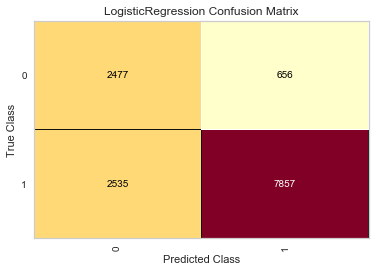

In [132]:
cm = ConfusionMatrix(best_clf)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [133]:
y_pred=best_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.79      0.61      3133
           1       0.92      0.76      0.83     10392

    accuracy                           0.76     13525
   macro avg       0.71      0.77      0.72     13525
weighted avg       0.82      0.76      0.78     13525



In [173]:
ydropped = df.drop('has_tiles', axis = 1)

In [139]:
test = X_test[(y_test == 0) & (y_pred[:] == 1)]
falsePositives = pd.DataFrame(test)


In [140]:
falsePositives = falsePositives.set_axis(df.columns, axis=1, inplace=False)

In [141]:
falsePositives

,fips,average_household_income,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0.438492,0.029655,0.714209,1.849533,-0.554960,0.872713,0.083533,0.697635,1.294293,0.075046,...,-0.132905,0.028827,-0.724228,-0.215147,-0.373608,-0.100918,-0.601370,-0.492426,-0.523423,-0.547329
1,-0.216310,-0.718833,-0.648631,0.583670,-0.411842,0.331135,0.451529,-0.696490,0.091572,0.138964,...,0.183566,0.634666,0.572204,2.200349,-0.373608,-0.100918,0.382465,0.931636,-0.523423,-0.468969
2,0.371195,0.603650,-0.009031,-1.345941,-0.411842,-1.520637,-0.963611,0.231357,-1.230851,-0.001656,...,0.025331,1.846344,1.220421,0.663215,-0.373608,-0.100918,1.304810,0.931636,1.292412,1.827000
3,1.096443,-0.206927,0.492809,0.199644,0.464756,-0.111114,0.086525,0.382073,0.298404,-0.078357,...,-0.871336,-1.182851,-1.372445,-1.532690,-0.373608,-0.100918,-0.724349,-0.492426,-0.523423,-0.543411
4,0.173400,-0.065455,-0.533011,-1.649369,0.786772,-1.660170,-1.128162,0.193678,-1.572857,-0.308463,...,-0.818591,0.230774,-0.508156,0.224034,-0.373608,-0.100918,1.366299,-0.492426,1.551817,1.732967
5,-0.412420,-0.706496,-1.012711,-0.973768,-0.554960,0.189237,-0.039132,-0.889595,-0.832658,-0.589703,...,0.183566,1.038559,2.300781,0.663215,-0.373608,-0.100918,-0.355411,0.575621,2.589436,0.479196
6,-0.148299,0.601177,0.254189,-0.582630,0.232189,-1.530097,-0.837953,0.532789,-0.620940,2.324967,...,-0.924081,-1.182851,-1.588517,-1.422895,-0.373608,-0.100918,-1.154777,-0.492426,-0.523423,-0.610018
7,-0.869319,2.270632,1.489109,-0.250756,0.482646,-0.981423,-0.996521,1.912785,0.229189,1.251141,...,-0.396630,-0.173119,-0.508156,-0.544533,-0.373608,-0.100918,-0.109453,-0.492426,-0.523423,-0.660952
8,1.180138,-0.083747,0.514949,0.270760,0.035402,-0.307407,-0.610574,0.108900,-0.014287,-0.397948,...,0.974742,-0.980904,-1.156373,-1.532690,-0.373608,-0.100918,1.058851,-0.492426,-0.523423,-0.782411
9,-0.869319,0.338684,1.562909,0.780424,0.035402,0.132478,-0.416104,0.947259,0.884700,0.036695,...,-0.396630,-0.173119,-0.508156,-0.544533,-0.373608,-0.100918,-0.109453,-0.492426,-0.523423,-0.660952


In [11]:
inversed = scaler.inverse_transform(falsePositives)

NameError: name 'scaler' is not defined

In [168]:
falsePositives = pd.DataFrame(inversed)

In [174]:
falsePositives = falsePositives.set_axis(ydropped.columns, axis=1, inplace=False)

In [175]:
falsePositives

,fips,average_household_income,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,3.707797e+10,69216.775510,750.0,1571.0,0.0,1175.0,418.0,344.0,4310.0,52.0,...,33.0,8.0,7.0,12.0,0.0,0.0,9.0,0.0,0.0,9.26
1,2.704718e+10,44522.559294,196.0,1037.0,8.0,946.0,541.0,48.0,2833.0,57.0,...,39.0,11.0,13.0,34.0,0.0,0.0,25.0,12.0,0.0,9.46
2,3.604706e+10,88154.098361,456.0,223.0,8.0,163.0,68.0,245.0,1209.0,46.0,...,36.0,17.0,16.0,20.0,0.0,0.0,40.0,12.0,7.0,15.32
3,4.715700e+10,61411.439313,660.0,875.0,57.0,759.0,419.0,277.0,3087.0,40.0,...,19.0,2.0,4.0,0.0,0.0,0.0,7.0,0.0,0.0,9.27
4,3.301708e+10,66078.894472,243.0,95.0,75.0,104.0,13.0,237.0,789.0,22.0,...,20.0,9.0,8.0,16.0,0.0,0.0,41.0,0.0,8.0,15.08
5,2.404300e+10,44929.605263,48.0,380.0,0.0,886.0,377.0,7.0,1698.0,0.0,...,39.0,13.0,21.0,20.0,0.0,0.0,13.0,9.0,12.0,11.88
6,2.808903e+10,88072.517730,563.0,545.0,44.0,159.0,110.0,309.0,1958.0,228.0,...,18.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,9.10
7,1.704384e+10,143151.364764,1065.0,685.0,58.0,391.0,57.0,602.0,3002.0,144.0,...,28.0,7.0,8.0,9.0,0.0,0.0,17.0,0.0,0.0,8.97
8,4.843912e+10,65475.417957,669.0,905.0,33.0,676.0,186.0,219.0,2703.0,15.0,...,54.0,3.0,5.0,0.0,0.0,0.0,36.0,0.0,0.0,8.66
9,1.704385e+10,79412.314126,1095.0,1120.0,33.0,862.0,251.0,397.0,3807.0,49.0,...,28.0,7.0,8.0,9.0,0.0,0.0,17.0,0.0,0.0,8.97


In [189]:
results = pd.merge(falsePositives, ozdf, left_on = falsePositives.fips.astype(np.int64), right_on = ozdf.Census_Tract_Number)

In [201]:
results = results.sort_values('population')

In [208]:
results.tail(20)

,key_0,fips,average_household_income,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,...,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate,State,County,Census_Tract_Number,Tract_Type,ACS_Data_Source
27,51059415401,5.105942e+10,88612.733704,696.0,889.0,132.0,611.0,1001.0,384.0,3837.0,...,0.0,40.0,0.0,0.0,9.12,Virginia,Fairfax,51059415401,Low-Income Community,2011-2015
44,36073040700,3.607304e+10,41587.077769,265.0,835.0,0.0,1739.0,975.0,98.0,3923.0,...,0.0,40.0,12.0,7.0,15.32,New York,Orleans,36073040700,Low-Income Community,2011-2015
68,48201321900,4.820132e+10,57006.415094,143.0,700.0,0.0,1093.0,1668.0,0.0,3604.0,...,0.0,36.0,0.0,0.0,8.66,Texas,Harris,48201321900,Low-Income Community,2011-2015
57,17089853200,1.708985e+10,51382.601626,297.0,789.0,5.0,1098.0,1416.0,37.0,3664.0,...,0.0,17.0,0.0,0.0,8.97,Illinois,Kane,17089853200,Low-Income Community,2011-2015
29,42027011100,4.202701e+10,54981.764270,977.0,1216.0,48.0,1739.0,463.0,227.0,4708.0,...,0.0,0.0,0.0,0.0,10.26,Pennsylvania,Centre,42027011100,Low-Income Community,2011-2015
61,39153502200,3.915350e+10,38759.120459,441.0,977.0,11.0,2039.0,884.0,116.0,4480.0,...,0.0,0.0,0.0,0.0,9.57,Ohio,Summit,39153502200,Low-Income Community,2011-2015
4,48061012102,4.806101e+10,33427.402597,71.0,635.0,6.0,822.0,1498.0,15.0,3058.0,...,0.0,36.0,0.0,0.0,8.66,Texas,Cameron,48061012102,Low-Income Community,2011-2015
10,48427950401,4.842795e+10,34708.082832,53.0,486.0,0.0,795.0,2015.0,0.0,3349.0,...,0.0,36.0,0.0,0.0,8.66,Texas,Starr,48427950401,Low-Income Community,2011-2015
20,17031822400,1.703182e+10,51408.750608,450.0,1299.0,0.0,1293.0,585.0,149.0,3834.0,...,0.0,17.0,0.0,0.0,8.97,Illinois,Cook,17031822400,Low-Income Community,2011-2015
16,24005402406,2.400540e+10,71721.486686,645.0,1312.0,12.0,1270.0,165.0,518.0,3922.0,...,0.0,13.0,9.0,12.0,11.88,Maryland,Baltimore,24005402406,Low-Income Community,2011-2015
